# IML Assignment 1

## Name: Evgenij Ivankin, group: DS21-01
## mail: e.ivankin@innoppolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [1]:
import pandas as pd

df = pd.read_csv('task1_data.csv')
df.head()

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108


In [125]:
def to_2d(df_col):
    return df_col.to_numpy().reshape(-1, 1)

In [35]:
X_train, y_train, X_test, y_test = map(to_2d, (df.X_train, df.y_train, df.X_test, df.y_test))

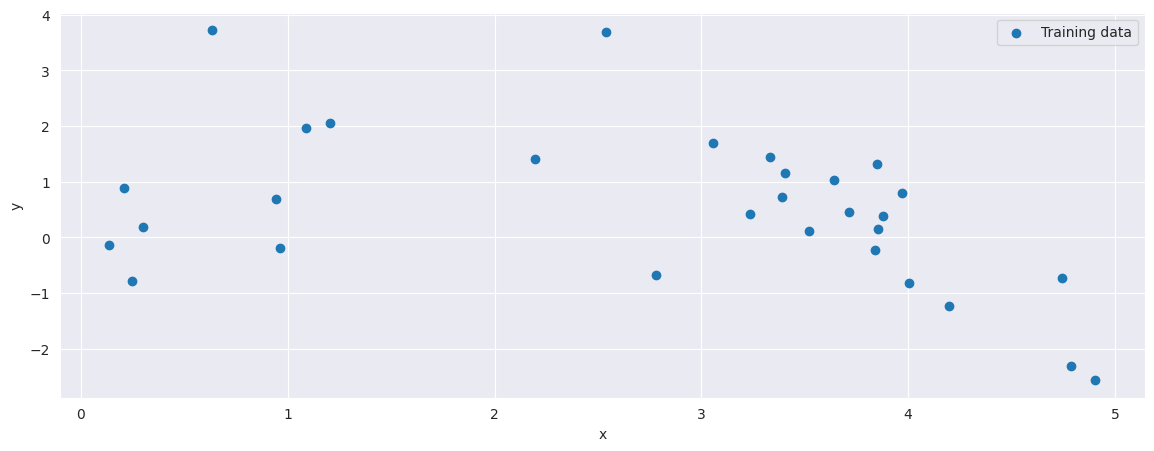

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.scatter(X_train, y_train, label='Training data')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [38]:
from sklearn import metrics

In [39]:
def print_metrics(y_actual, y_pred):
    print("Mean Squared Error:", metrics.mean_squared_error(y_actual, y_pred))
    print("Root Mean Squared Error:",
          np.sqrt(metrics.mean_squared_error(y_actual, y_pred, squared=False)))
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_actual, y_pred))
    print("R2 Score:", metrics.r2_score(y_actual, y_pred))

In [40]:
print_metrics(y_test, y_pred_lr)

Mean Squared Error: 0.78105677092199
Root Mean Squared Error: 0.9400926352495463
Mean Absolute Error: 0.7837610302414408
R2 Score: 0.2609450135378707


#### Plotting original data and prediction


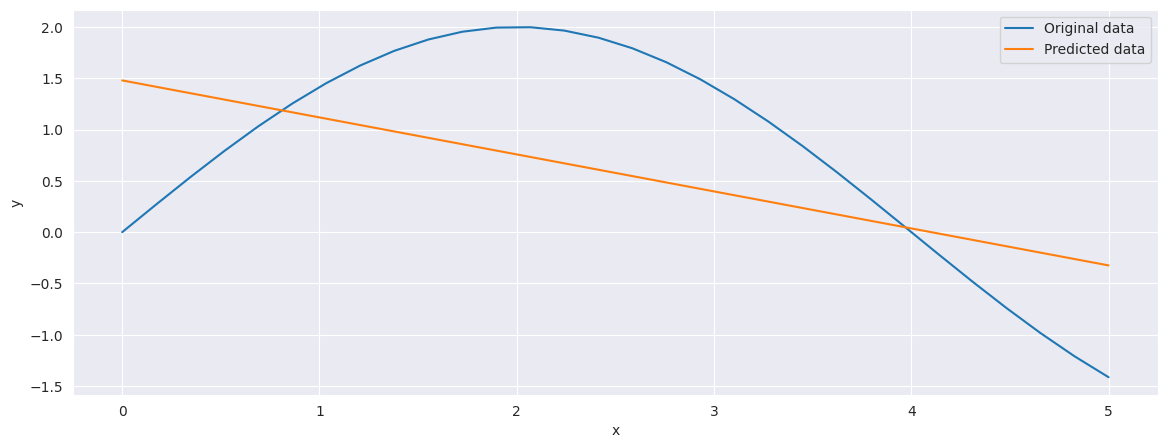

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label='Original data')
plt.plot(X_test, y_pred_lr, label='Predicted data')

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer
**Answer**: No, it does not. Relation between `y` and `X` is not linear, so the model underfits because this model is not complex enough for this task.

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [42]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [43]:
pipeline = Pipeline([
    ('poly_feat', PolynomialFeatures()), ('lin_reg', LinearRegression())]
)

#### Tuning the degree hyper-parameter using GridSearch

In [44]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [53]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 10)
parameters = {'poly_feat__degree': degrees}

search = GridSearchCV(pipeline, param_grid=parameters, cv=8, scoring='neg_mean_squared_error')

search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_, search.best_params_)

Best parameter (CV score=-1.078): {'poly_feat__degree': 2}


In [54]:
y_pred_poly = search.predict(X_test)
print_metrics(y_test, y_pred_poly)

Mean Squared Error: 0.08205877217937993
Root Mean Squared Error: 0.5352186689202394
Mean Absolute Error: 0.15213273421671733
R2 Score: 0.9223539862658873


#### Manually finding the best degree

In [55]:
best_pipeline = None
best_score = None
best_degree = None
for degree in degrees:
    pipeline = Pipeline([
        ('poly_feat', PolynomialFeatures(degree=degree)), ('lin_reg', LinearRegression())]
    )
    score = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=8)
    if best_score is None or score.mean() > best_score:
        best_pipeline = pipeline
        best_score = score.mean()
        best_degree = degree

print("Best parameter (CV score=%0.3f):" % best_score, best_degree)
y_pred_poly = search.predict(X_test)
print_metrics(y_test, y_pred_poly)

Best parameter (CV score=-1.078): 2
Mean Squared Error: 0.08205877217937993
Root Mean Squared Error: 0.5352186689202394
Mean Absolute Error: 0.15213273421671733
R2 Score: 0.9223539862658873


#### Plotting the test data and the best degree polynomial model

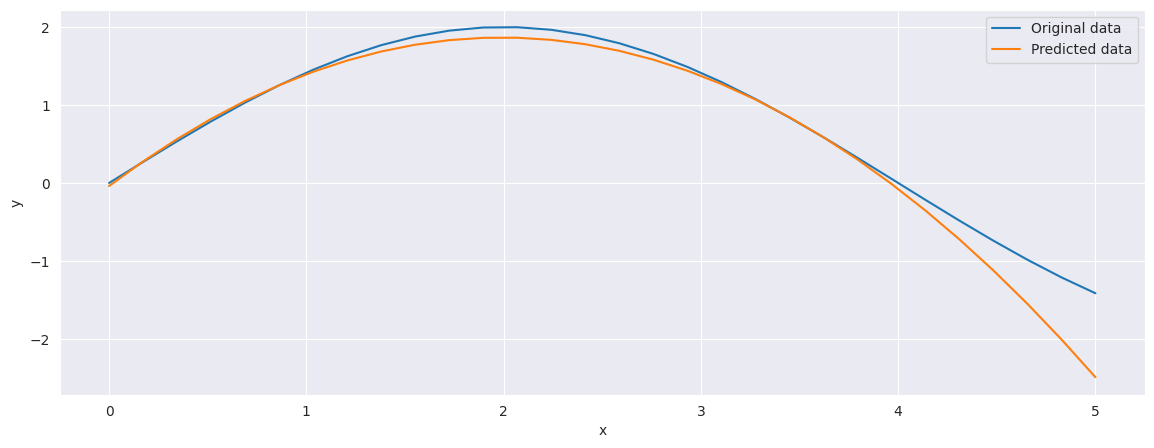

In [51]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="Original data")
plt.plot(X_test, y_pred_poly, label="Predicted data")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [66]:
df = pd.read_csv('pokemon_modified.csv')
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [63]:
df.name.value_counts()

Bulbasaur    1
Sawk         1
Drilbur      1
Excadrill    1
Audino       1
            ..
Lombre       1
Ludicolo     1
Seedot       1
Nuzleaf      1
Magearna     1
Name: name, Length: 801, dtype: int64

In [64]:
df.classification.value_counts()

Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon    1
Name: classification, Length: 588, dtype: int64

In [65]:
df.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dragon       29
fighting     29
dark         29
ghost        27
steel        24
ice          23
fairy        18
Name: type1, dtype: int64

#### Remove the 2 redundant features
**Justification**: Columns `name` and `classification` should be removed because they have too many values with only one related pokemon, which will probably cause the model to overfit on them (remember which value maps to which label).

In [82]:
X = df.drop(['name', 'classification', 'is_legendary'], axis=1)

y = df.is_legendary

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,
                                                    stratify=y)

Check if the dataset is balanced or not and comment on it

In [115]:
y_df = pd.DataFrame(columns=["all", "train", "test"])
y_df["all"] = y
y_df["train"] = y_train
y_df["test"] = y_test

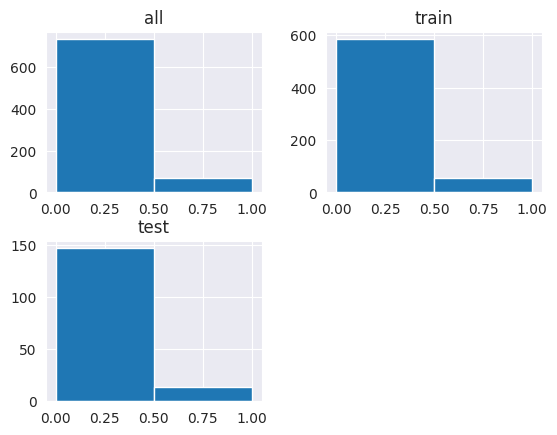

In [116]:
y_df.hist(bins=2, sharey=False)
plt.show()

As we can see, dataset **is not** balanced, the number of non-legendary pokemons is significantly bigger than the number of legendary pokemons. In such case, stratified sampling is recommended.

#### Exploring the dataset and checking for missing values

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

As we can see in info above, there are 3 columns with missing values: `height_m`, `percentage_mal` and `weight_kg`. Also, the column `type1` has non-numerical data type, so it should be categorically encoded.

#### Impute the missing values

In [186]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)


def impute_df(input_df):
    return pd.DataFrame(imputer.transform(input_df), columns=input_df.columns).astype(
        input_df.dtypes.to_dict())

In [187]:
imputed_x_train = impute_df(X_train)
imputed_x_test = impute_df(X_test)

#### Double check that there are no missing values

In [188]:
imputed_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        161 non-null    float64
 1   against_dark       161 non-null    float64
 2   against_dragon     161 non-null    float64
 3   against_electric   161 non-null    float64
 4   against_fairy      161 non-null    float64
 5   against_fight      161 non-null    float64
 6   against_fire       161 non-null    float64
 7   against_flying     161 non-null    float64
 8   against_ghost      161 non-null    float64
 9   against_grass      161 non-null    float64
 10  against_ground     161 non-null    float64
 11  against_ice        161 non-null    float64
 12  against_normal     161 non-null    float64
 13  against_poison     161 non-null    float64
 14  against_psychic    161 non-null    float64
 15  against_rock       161 non-null    float64
 16  against_steel      161 non

In [189]:
imputed_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 non

#### Encode categorically

In [190]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(to_2d(X_train.type1))


def encode_type(input_df):
    new_feats = one_hot_encoder.transform(to_2d(input_df.type1)).toarray()
    new_cols = pd.DataFrame(new_feats, columns=one_hot_encoder.get_feature_names_out(['type1']),
                            dtype=np.int8)
    return pd.concat([input_df, new_cols], axis=1).drop(['type1'], axis=1)

In [191]:
encoded_x_train = encode_type(imputed_x_train)
encoded_x_test = encode_type(imputed_x_test)

In [192]:
encoded_x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        161 non-null    float64
 1   against_dark       161 non-null    float64
 2   against_dragon     161 non-null    float64
 3   against_electric   161 non-null    float64
 4   against_fairy      161 non-null    float64
 5   against_fight      161 non-null    float64
 6   against_fire       161 non-null    float64
 7   against_flying     161 non-null    float64
 8   against_ghost      161 non-null    float64
 9   against_grass      161 non-null    float64
 10  against_ground     161 non-null    float64
 11  against_ice        161 non-null    float64
 12  against_normal     161 non-null    float64
 13  against_poison     161 non-null    float64
 14  against_psychic    161 non-null    float64
 15  against_rock       161 non-null    float64
 16  against_steel      161 non

#### Scale the data

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(encoded_x_train)


def scale_df(input_df):
    return pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)


x_train = scale_df(encoded_x_train)
x_test = scale_df(encoded_x_test)

x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.016434,-0.146072,0.113189,1.432760,-0.129599,1.259518,-1.317876,-1.141267,-0.004094,3.785345,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,2.456210
1,0.016434,2.040734,0.113189,-0.109656,-1.088485,-0.770939,-0.939651,-0.301231,1.742704,-0.690924,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,3.593472,-0.247709,-0.184189,-0.407131
2,0.016434,-0.146072,0.113189,-0.880864,-1.088485,-0.770939,1.329695,1.378840,-0.004094,-1.010658,...,-0.197386,3.138066,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
3,0.016434,-0.146072,0.113189,-0.109656,-0.129599,1.259518,-0.183202,-0.301231,-1.750892,-0.051457,...,-0.197386,-0.318668,-0.201619,-0.179605,2.627020,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
4,0.016434,-0.146072,0.113189,-1.652072,-0.129599,-0.094120,-0.183202,-0.301231,-0.004094,1.227477,...,-0.197386,-0.318668,4.959839,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.016434,-0.146072,0.113189,-0.109656,-0.129599,1.259518,-0.939651,-1.141267,-0.004094,1.227477,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,4.036991,-0.184189,-0.407131
636,0.016434,-0.146072,0.113189,1.432760,-0.129599,-0.094120,-0.939651,-0.301231,-0.004094,1.227477,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,2.456210
637,0.016434,-0.146072,0.113189,-0.880864,-1.088485,-0.770939,1.329695,1.378840,-0.004094,-1.010658,...,-0.197386,3.138066,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
638,0.016434,-0.146072,0.113189,-1.652072,-0.129599,-0.770939,1.329695,1.378840,-0.004094,-0.051457,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131


In [196]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 non

#### Correlation Matrix

Are there highly co-related features in the dataset? Is it a problem?

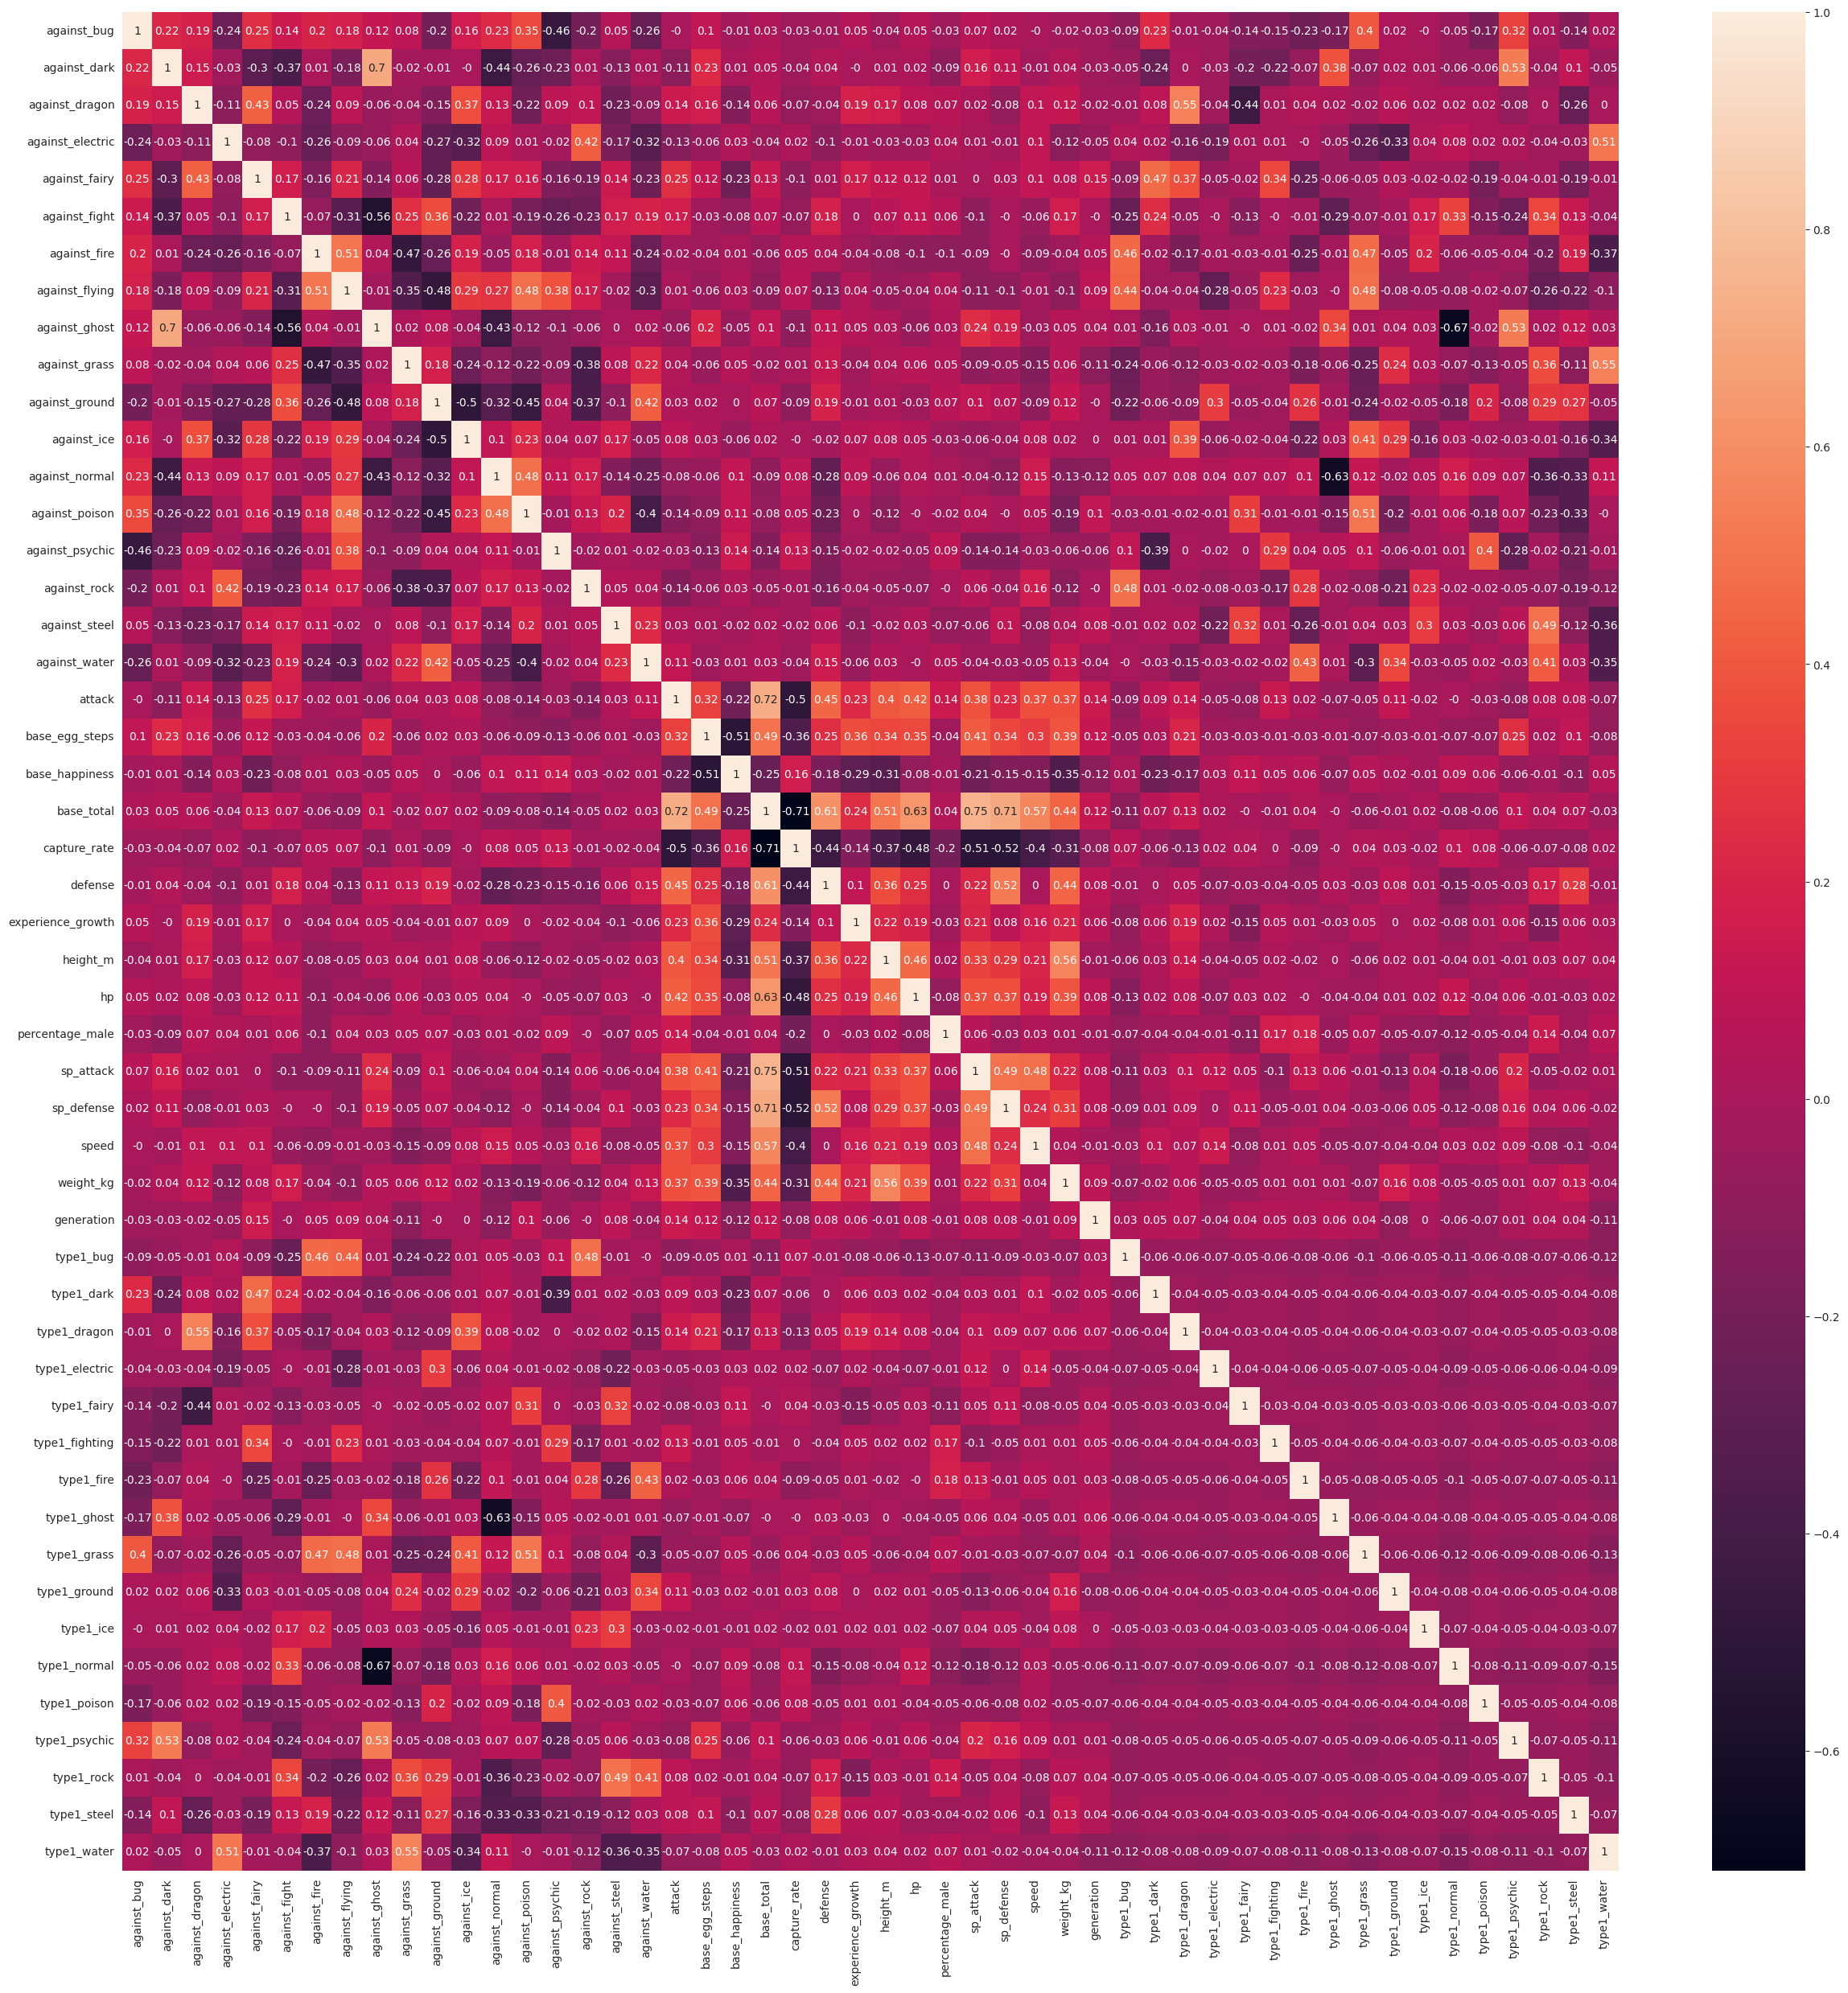

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
corr_matrix = x_train.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

There are a few highly co-related (with coefficient $\ge 0.7$ or $\le -0.7$) features in the dataset. These features will negatively impact the performance of a logistic regression classifier.

### Drop correlating features for logistic regression

In [255]:
def get_non_corr_features(input_df, threshold=0.7):
    df_corr = input_df.corr()
    size = df_corr.shape[0]
    columns = np.full((size,), True, dtype=bool)
    for i in range(size):
        for j in range(i + 1, size):
            if columns[j] and df_corr.iloc[i,j] >= threshold:
                columns[j] = False
    return input_df.columns[columns]

In [256]:
selected_cols = get_non_corr_features(x_train)
filtered_x_train = x_train[selected_cols]
filtered_x_test = x_test[selected_cols]
filtered_x_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.016434,-0.146072,0.113189,1.432760,-0.129599,1.259518,-1.317876,-1.141267,-0.004094,3.785345,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,2.456210
1,0.016434,2.040734,0.113189,-0.109656,-1.088485,-0.770939,-0.939651,-0.301231,1.742704,-0.690924,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,3.593472,-0.247709,-0.184189,-0.407131
2,0.016434,-0.146072,0.113189,-0.880864,-1.088485,-0.770939,1.329695,1.378840,-0.004094,-1.010658,...,-0.197386,3.138066,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
3,0.016434,-0.146072,0.113189,-0.109656,-0.129599,1.259518,-0.183202,-0.301231,-1.750892,-0.051457,...,-0.197386,-0.318668,-0.201619,-0.179605,2.627020,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
4,0.016434,-0.146072,0.113189,-1.652072,-0.129599,-0.094120,-0.183202,-0.301231,-0.004094,1.227477,...,-0.197386,-0.318668,4.959839,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131


### Model fitting and Comparison

#### Tuning LR model

In [257]:
def print_clf_metrics(y_actual, y_pred):
    print("Accuracy:", metrics.accuracy_score(y_actual, y_pred))
    print("Precision:", metrics.precision_score(y_actual, y_pred))
    print("Recall:", metrics.recall_score(y_actual, y_pred))
    print("F1 Score:", metrics.f1_score(y_actual, y_pred))

In [258]:
parameters = [{
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
    },
    {
        'C': np.logspace(-3, 3, 7),
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs'],
     }

]

max_iter=1000 in LR constructor

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=parameters, scoring='accuracy')

In [273]:
gs_clf.fit(filtered_x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [274]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [275]:
lr_clf = LogisticRegression(max_iter=1000, **gs_clf.best_params_)

In [276]:
y_pred_lr = lr_clf.fit(filtered_x_train, y_train).predict(filtered_x_test)

In [277]:
print_clf_metrics(y_test, y_pred_lr)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


### Comparison with learning on unfiltered data

In [278]:
unfiltered_gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=parameters, scoring='accuracy')
unfiltered_gs_clf.fit(x_train, y_train)
print(unfiltered_gs_clf.best_params_)
unfiltered_lr_clf = LogisticRegression(max_iter=1000, **unfiltered_gs_clf.best_params_)
y_pred_lr_unfiltered = unfiltered_lr_clf.fit(x_train, y_train).predict(x_test)
print_clf_metrics(y_test, y_pred_lr_unfiltered)

{'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9813664596273292
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931


As we can see, dropping correlated features for logistic regression improved its performance.

#### Print the top 5 most influencing features and the top 5 ignored features

In [279]:
coefficients = pd.DataFrame(lr_clf.coef_.reshape(-1, 1), index=filtered_x_train.columns, columns=['coef'])

print("Top 5 ignored features:", coefficients.iloc[coefficients.coef.abs().argsort()[:5]])
print("Top 5 most influencing features:", coefficients.iloc[(-coefficients.coef.abs()).argsort()[:5]])

Top 5 ignored features:               coef
against_bug    0.0
type1_grass    0.0
type1_bug      0.0
type1_dark     0.0
type1_poison   0.0
Top 5 most influencing features:                        coef
base_egg_steps     2.194009
type1_normal      -1.791542
capture_rate      -1.650942
experience_growth  0.974396
against_dragon    -0.921089


#### Tuning KNN model

In [280]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='accuracy')

grid_search_clf.fit(x_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 0.9515625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [281]:
knn = KNeighborsClassifier(**grid_search_clf.best_params_)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print_clf_metrics(y_test, y_pred_knn)

Accuracy: 0.9813664596273292
Precision: 1.0
Recall: 0.7857142857142857
F1 Score: 0.88


#### Fitting GNB to the data and evaluating on the test dataset

In [282]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred_gauss_nb = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred_gauss_nb)

Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 Score: 0.717948717948718


#### Which metric is most appropriate for this task and why?
**Answer**: F1 score is the most appropriate metric for this task because there is a class imbalance in the training data.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?


**Answer**:
 - Logistic regression shows the best accuracy, recall and f1-score among the 3 classifiers.
 - KNN shows the best precision among the 3 classifiers, but also it shows the worst recall.
 - Gaussian Naive Bayes shows the best recall among the 3 classifiers (as well as logistic regression), but also it shows the worst precision.

Logistic regression is the best model for this task because it shows the best performance (highest F1-score, other metrics are quite good as well compared to other models).

## Bonus Task

#### Loading the Dataset

In [283]:
import pandas as pd

train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data.head()

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0


In [284]:
test_data.head()

,var1,var2,var3,target
0,26.052523,4.698298,239.765969,1
1,62.205061,4.373559,207.581273,1
2,11.390621,4.494386,244.578095,0
3,35.320556,2.731171,322.284266,2
4,53.508643,3.575985,247.902236,1


In [285]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

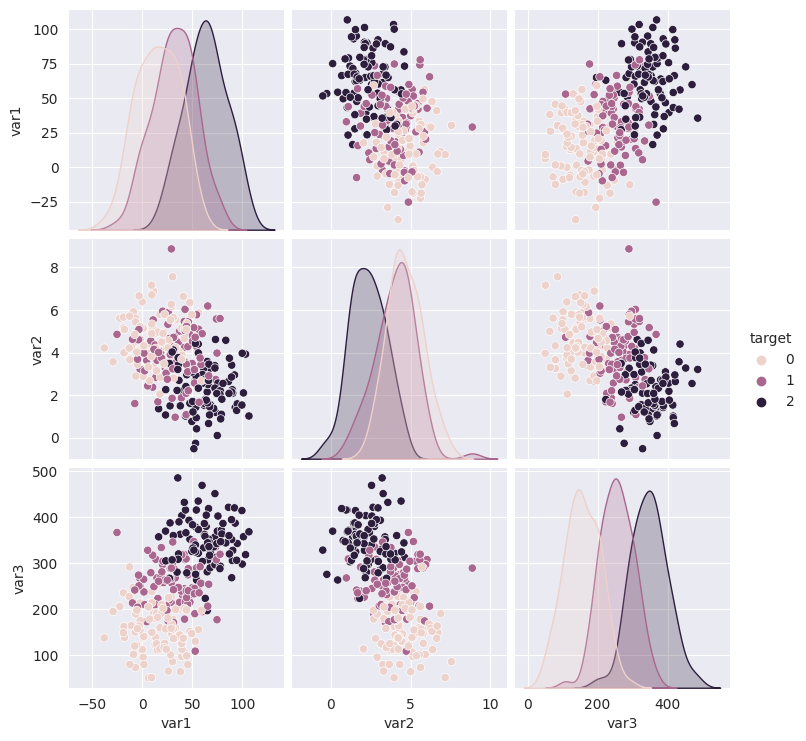

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, hue='target', kind='scatter')
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [291]:
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train, y_train)
y_pred_multi_lr = multi_lr.predict(X_test)

In [292]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_multi_lr))

Accuracy: 0.9


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [293]:
multi_lr = LogisticRegression(multi_class='ovr')
multi_lr.fit(X_train, y_train)
y_pred_multi_lr = multi_lr.predict(X_test)

In [294]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_multi_lr))

Accuracy: 0.8


#### Using gridsearch to tune the C value and multi class

In [295]:
params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['ovr', 'multinomial']
}

In [297]:
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=params, scoring='accuracy')

grid_search_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['ovr', 'multinomial']},
             scoring='accuracy')

In [298]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


<AxesSubplot: >

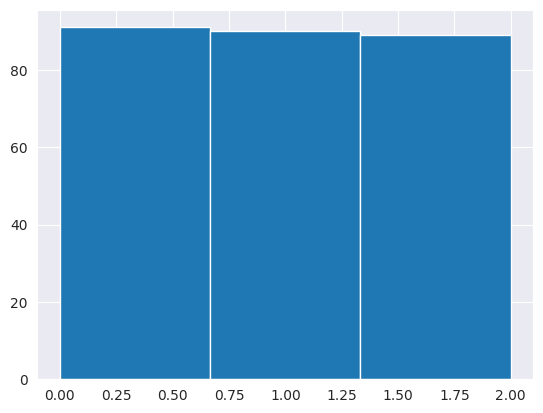

In [315]:
y_train.hist(bins=3)

#### Comment on why one multi_class technique was better than the other
Multinomial technique was better than OVR technique because it is designed for multiclass classification, while OVR technique is splits such a task to multiple binary classification problems.

#### Create LR with the best params

In [300]:
multi_lr = LogisticRegression(max_iter=1000, **grid_search_clf.best_params_)

#### Visualize the decision boundaries

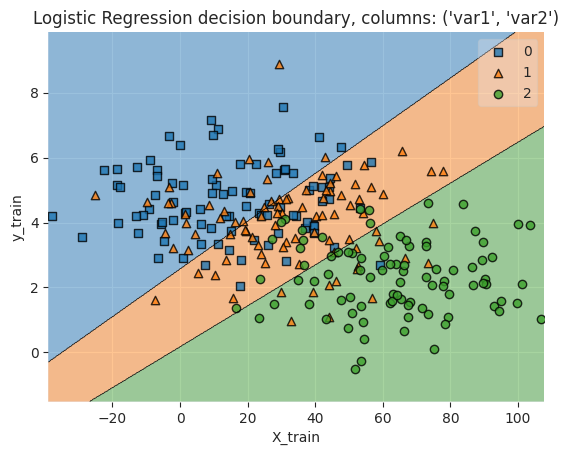

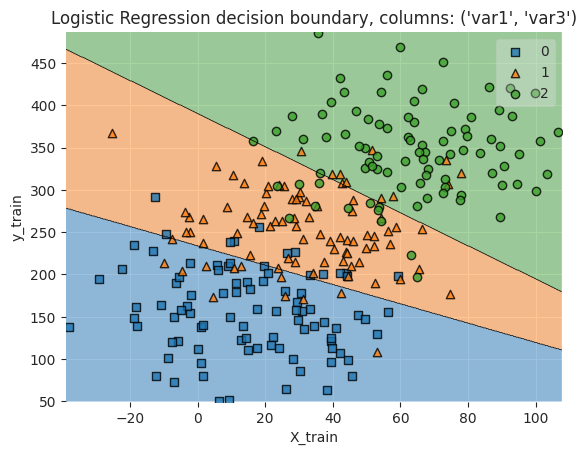

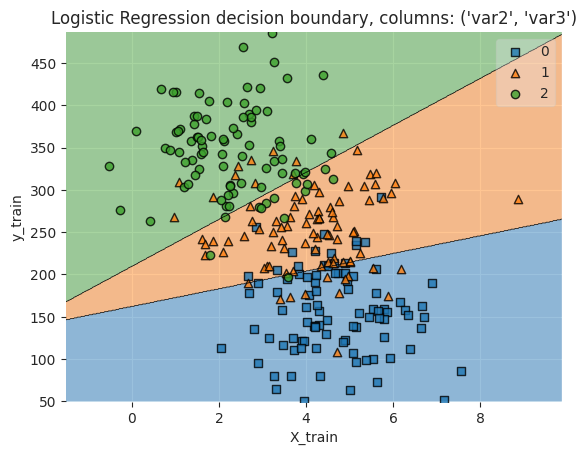

In [314]:
from mlxtend.plotting import plot_decision_regions
from itertools import combinations

for features in combinations(X_train.columns, 2):
    multi_lr.fit(np.array(X_train[list(features)]), y_train)

    plot_decision_regions(np.array(X_train[list(features)]), np.array(y_train), multi_lr)

    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title(f'Logistic Regression decision boundary, columns: {features}')
    plt.show()